# 중고 자동차 가격 결정 요인 분석

In [393]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model

In [394]:
brand = pd.read_csv('/Users/mac/Documents/GitHub/python-training/notebooks/data_set/brand.csv')
cars = pd.read_csv('/Users/mac/Documents/GitHub/python-training/notebooks/data_set/cars.csv')
print(cars)

               title  Price  Mileage(miles)  Registration_Year  \
0        SKODA FABIA   6900           70189               2016   
1     VAUXHALL CORSA   1495           88585               2008   
2        HYUNDAI I30    949          137000               2011   
3         MINI HATCH   2395           96731               2010   
4     VAUXHALL CORSA   1000           85000               2013   
...              ...    ...             ...                ...   
3682  RENAULT MEGANE   1395           76202               2006   
3683         AUDI A4   6990          119000               2012   
3684    BMW 3 SERIES   3995          139000               2013   
3685    HONDA ACCORD   1390          179190               2007   
3686  VAUXHALL CORSA   2000           82160               2013   

      Previous Owners Fuel type  Body type Engine Gearbox  Doors  Seats  \
0                 3.0    Diesel  Hatchback   1.4L  Manual    5.0    5.0   
1                 4.0    Petrol  Hatchback   1.2L  Manual

In [395]:
# 데이터 합치기
df = brand.merge(cars, on='title', how='outer')
df.head()

,title,country,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,ABARTH 500,NaN,4950.0,88000.0,2009.0,8.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 5,NaN
1,ABARTH 595,NaN,11699.0,42237.0,2018.0,NaN,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 6,NaN
2,ABARTH FIAT 595 1.4 TJET (165PS) SCORPIONEORO,NaN,17000.0,17670.0,2020.0,1.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 6,NaN
3,ALFA ROMEO 159,NaN,2250.0,132000.0,2008.0,2.0,Petrol,Saloon,1.8L,Manual,4.0,5.0,Euro 4,NaN
4,ALFA ROMEO 159,NaN,2420.0,86400.0,2009.0,5.0,Diesel,Saloon,1.9L,Manual,4.0,5.0,Euro 4,NaN


In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3735 non-null   object 
 1   country            48 non-null     object 
 2   Price              3687 non-null   float64
 3   Mileage(miles)     3687 non-null   float64
 4   Registration_Year  3687 non-null   float64
 5   Previous Owners    2276 non-null   float64
 6   Fuel type          3687 non-null   object 
 7   Body type          3687 non-null   object 
 8   Engine             3642 non-null   object 
 9   Gearbox            3687 non-null   object 
 10  Doors              3662 non-null   float64
 11  Seats              3652 non-null   float64
 12  Emission Class     3600 non-null   object 
 13  Service history    540 non-null    object 
dtypes: float64(6), object(8)
memory usage: 408.6+ KB


In [397]:
st = df.describe()
display(st)

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3687.000000,3.687000e+03,3687.000000,2276.000000,3662.000000,3652.000000
mean,5787.301058,8.132854e+04,2011.846216,2.807557,4.321409,4.900329
std,4480.629885,3.941718e+04,5.082387,1.546028,0.986760,0.577046
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.500000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,5.000000,7.000000


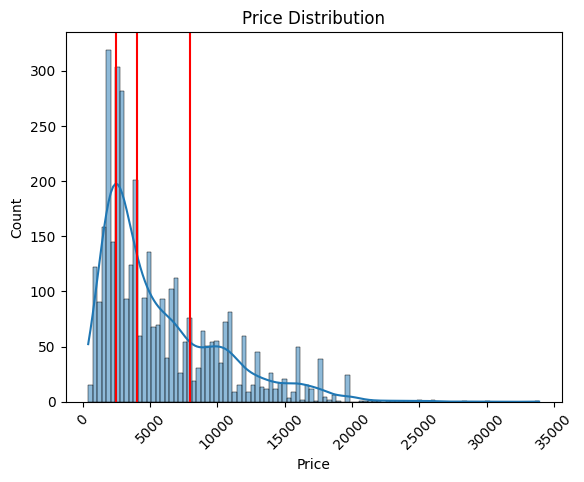

In [398]:
# price 분포 확인
sns.histplot(data=df, x='Price', bins=100, kde=True)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution')
plt.xticks(rotation=45)
plt.axvline(x=st['Price'].loc['25%'], color='red')
plt.axvline(x=st['Price'].loc['50%'], color='red')
plt.axvline(x=st['Price'].loc['75%'], color='red')


plt.show()

In [399]:
numeric_number = df.select_dtypes(include='number')
numeric_number

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
0,4950.0,88000.0,2009.0,8.0,3.0,4.0
1,11699.0,42237.0,2018.0,NaN,3.0,4.0
2,17000.0,17670.0,2020.0,1.0,3.0,4.0
3,2250.0,132000.0,2008.0,2.0,4.0,5.0
4,2420.0,86400.0,2009.0,5.0,4.0,5.0
...,...,...,...,...,...,...
3730,NaN,NaN,NaN,NaN,NaN,NaN
3731,NaN,NaN,NaN,NaN,NaN,NaN
3732,NaN,NaN,NaN,NaN,NaN,NaN
3733,NaN,NaN,NaN,NaN,NaN,NaN


In [400]:
q3 = numeric_number['Price'].quantile(0.75)
q3

np.float64(7995.0)

In [401]:
df = df[df["Price"] < q3]
df

,title,country,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,ABARTH 500,NaN,4950.0,88000.0,2009.0,8.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 5,NaN
3,ALFA ROMEO 159,NaN,2250.0,132000.0,2008.0,2.0,Petrol,Saloon,1.8L,Manual,4.0,5.0,Euro 4,NaN
4,ALFA ROMEO 159,NaN,2420.0,86400.0,2009.0,5.0,Diesel,Saloon,1.9L,Manual,4.0,5.0,Euro 4,NaN
5,ALFA ROMEO 159,NaN,2489.0,68000.0,2008.0,2.0,Diesel,Saloon,2.4L,Automatic,4.0,5.0,Euro 4,NaN
6,ALFA ROMEO BRERA,NaN,1990.0,109000.0,2007.0,NaN,Diesel,Coupe,2.4L,Manual,3.0,4.0,Euro 4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,VOLVO V70,NaN,795.0,274100.0,2004.0,6.0,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,NaN
3683,VOLVO V70,NaN,795.0,274100.0,2004.0,6.0,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,NaN
3684,VOLVO V70,NaN,2195.0,144726.0,2006.0,NaN,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 4,NaN
3685,VOLVO XC90,NaN,2995.0,174500.0,2006.0,3.0,Diesel,SUV,2.4L,Automatic,5.0,7.0,Euro 4,NaN


In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2749 entries, 0 to 3686
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2749 non-null   object 
 1   country            0 non-null      object 
 2   Price              2749 non-null   float64
 3   Mileage(miles)     2749 non-null   float64
 4   Registration_Year  2749 non-null   float64
 5   Previous Owners    1673 non-null   float64
 6   Fuel type          2749 non-null   object 
 7   Body type          2749 non-null   object 
 8   Engine             2709 non-null   object 
 9   Gearbox            2749 non-null   object 
 10  Doors              2729 non-null   float64
 11  Seats              2720 non-null   float64
 12  Emission Class     2675 non-null   object 
 13  Service history    356 non-null    object 
dtypes: float64(6), object(8)
memory usage: 322.1+ KB


In [403]:
# df['Price'] 칼럼의 NaN값 갯수 학인하기
df['Price'].isnull().sum()

np.int64(0)

In [404]:
# df['Price'] 칼럼의 NaN값인 행 추출
price_nan = df[df.Price.isna()]
price_nan

,title,country,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history


In [405]:
# df['Price'] 칼럼의 NaN값이 아닌 모든 행 추출 -> df로 저장
df = df[df.Price.notna()]
df

,title,country,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,ABARTH 500,NaN,4950.0,88000.0,2009.0,8.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 5,NaN
3,ALFA ROMEO 159,NaN,2250.0,132000.0,2008.0,2.0,Petrol,Saloon,1.8L,Manual,4.0,5.0,Euro 4,NaN
4,ALFA ROMEO 159,NaN,2420.0,86400.0,2009.0,5.0,Diesel,Saloon,1.9L,Manual,4.0,5.0,Euro 4,NaN
5,ALFA ROMEO 159,NaN,2489.0,68000.0,2008.0,2.0,Diesel,Saloon,2.4L,Automatic,4.0,5.0,Euro 4,NaN
6,ALFA ROMEO BRERA,NaN,1990.0,109000.0,2007.0,NaN,Diesel,Coupe,2.4L,Manual,3.0,4.0,Euro 4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,VOLVO V70,NaN,795.0,274100.0,2004.0,6.0,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,NaN
3683,VOLVO V70,NaN,795.0,274100.0,2004.0,6.0,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,NaN
3684,VOLVO V70,NaN,2195.0,144726.0,2006.0,NaN,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 4,NaN
3685,VOLVO XC90,NaN,2995.0,174500.0,2006.0,3.0,Diesel,SUV,2.4L,Automatic,5.0,7.0,Euro 4,NaN


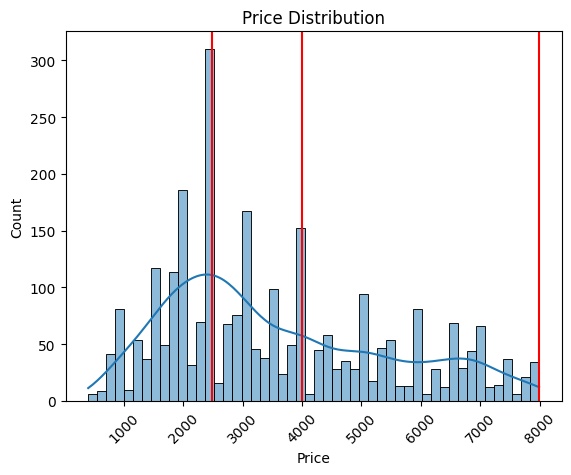

In [406]:
# 이상치 제거된 price 분포 확인
sns.histplot(data=df, x='Price', bins=50, kde=True)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution')
plt.xticks(rotation=45)
plt.axvline(x=st['Price'].loc['25%'], color='red')
plt.axvline(x=st['Price'].loc['50%'], color='red')
plt.axvline(x=st['Price'].loc['75%'], color='red')


plt.show()

In [407]:
# 전체 데이터 중 결측치 비율
# missing_ratio = df.isnull().sum() / len(df)
# missing_ratio
df.isnull().mean() * 100

title                  0.000000
country              100.000000
Price                  0.000000
Mileage(miles)         0.000000
Registration_Year      0.000000
Previous Owners       39.141506
Fuel type              0.000000
Body type              0.000000
Engine                 1.455075
Gearbox                0.000000
Doors                  0.727537
Seats                  1.054929
Emission Class         2.691888
Service history       87.049836
dtype: float64

In [408]:
df = df.drop(labels=['country', 'Previous Owners', 'Service history'], axis=1)
df

,title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class
0,ABARTH 500,4950.0,88000.0,2009.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 5
3,ALFA ROMEO 159,2250.0,132000.0,2008.0,Petrol,Saloon,1.8L,Manual,4.0,5.0,Euro 4
4,ALFA ROMEO 159,2420.0,86400.0,2009.0,Diesel,Saloon,1.9L,Manual,4.0,5.0,Euro 4
5,ALFA ROMEO 159,2489.0,68000.0,2008.0,Diesel,Saloon,2.4L,Automatic,4.0,5.0,Euro 4
6,ALFA ROMEO BRERA,1990.0,109000.0,2007.0,Diesel,Coupe,2.4L,Manual,3.0,4.0,Euro 4
...,...,...,...,...,...,...,...,...,...,...,...
3682,VOLVO V70,795.0,274100.0,2004.0,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3
3683,VOLVO V70,795.0,274100.0,2004.0,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3
3684,VOLVO V70,2195.0,144726.0,2006.0,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 4
3685,VOLVO XC90,2995.0,174500.0,2006.0,Diesel,SUV,2.4L,Automatic,5.0,7.0,Euro 4


In [414]:
df = df[df.Engine.notna()]
df

,title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class
0,ABARTH 500,4950.0,88000.0,2009.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 5
3,ALFA ROMEO 159,2250.0,132000.0,2008.0,Petrol,Saloon,1.8L,Manual,4.0,5.0,Euro 4
4,ALFA ROMEO 159,2420.0,86400.0,2009.0,Diesel,Saloon,1.9L,Manual,4.0,5.0,Euro 4
5,ALFA ROMEO 159,2489.0,68000.0,2008.0,Diesel,Saloon,2.4L,Automatic,4.0,5.0,Euro 4
6,ALFA ROMEO BRERA,1990.0,109000.0,2007.0,Diesel,Coupe,2.4L,Manual,3.0,4.0,Euro 4
...,...,...,...,...,...,...,...,...,...,...,...
3682,VOLVO V70,795.0,274100.0,2004.0,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3
3683,VOLVO V70,795.0,274100.0,2004.0,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3
3684,VOLVO V70,2195.0,144726.0,2006.0,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 4
3685,VOLVO XC90,2995.0,174500.0,2006.0,Diesel,SUV,2.4L,Automatic,5.0,7.0,Euro 4


In [416]:
df["Engine"] = df["Engine"].apply(lambda x: float(x.replace("L", "")))
df

/var/folders/6j/_sljwl6x709323gqwrjb1tn80000gn/T/ipykernel_1690/2417103692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Engine"] = df["Engine"].apply(lambda x: float(x.replace("L", "")))


,title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class
0,ABARTH 500,4950.0,88000.0,2009.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,Euro 5
3,ALFA ROMEO 159,2250.0,132000.0,2008.0,Petrol,Saloon,1.8,Manual,4.0,5.0,Euro 4
4,ALFA ROMEO 159,2420.0,86400.0,2009.0,Diesel,Saloon,1.9,Manual,4.0,5.0,Euro 4
5,ALFA ROMEO 159,2489.0,68000.0,2008.0,Diesel,Saloon,2.4,Automatic,4.0,5.0,Euro 4
6,ALFA ROMEO BRERA,1990.0,109000.0,2007.0,Diesel,Coupe,2.4,Manual,3.0,4.0,Euro 4
...,...,...,...,...,...,...,...,...,...,...,...
3682,VOLVO V70,795.0,274100.0,2004.0,Petrol,Estate,2.4,Automatic,5.0,5.0,Euro 3
3683,VOLVO V70,795.0,274100.0,2004.0,Petrol,Estate,2.4,Automatic,5.0,5.0,Euro 3
3684,VOLVO V70,2195.0,144726.0,2006.0,Petrol,Estate,2.4,Automatic,5.0,5.0,Euro 4
3685,VOLVO XC90,2995.0,174500.0,2006.0,Diesel,SUV,2.4,Automatic,5.0,7.0,Euro 4


# 상관계수 분석

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2709 entries, 0 to 3686
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2709 non-null   object 
 1   Price              2709 non-null   float64
 2   Mileage(miles)     2709 non-null   float64
 3   Registration_Year  2709 non-null   float64
 4   Fuel type          2709 non-null   object 
 5   Body type          2709 non-null   object 
 6   Engine             2709 non-null   float64
 7   Gearbox            2709 non-null   object 
 8   Doors              2698 non-null   float64
 9   Seats              2689 non-null   float64
 10  Emission Class     2675 non-null   object 
dtypes: float64(6), object(5)
memory usage: 254.0+ KB


In [418]:
df_continuous = df.select_dtypes(include=['float'])
df_discrete = df.select_dtypes(exclude=['float'])

display(df_continuous)
display(df_discrete)

,Price,Mileage(miles),Registration_Year,Engine,Doors,Seats
0,4950.0,88000.0,2009.0,1.4,3.0,4.0
3,2250.0,132000.0,2008.0,1.8,4.0,5.0
4,2420.0,86400.0,2009.0,1.9,4.0,5.0
5,2489.0,68000.0,2008.0,2.4,4.0,5.0
6,1990.0,109000.0,2007.0,2.4,3.0,4.0
...,...,...,...,...,...,...
3682,795.0,274100.0,2004.0,2.4,5.0,5.0
3683,795.0,274100.0,2004.0,2.4,5.0,5.0
3684,2195.0,144726.0,2006.0,2.4,5.0,5.0
3685,2995.0,174500.0,2006.0,2.4,5.0,7.0


,title,Fuel type,Body type,Gearbox,Emission Class
0,ABARTH 500,Petrol,Hatchback,Manual,Euro 5
3,ALFA ROMEO 159,Petrol,Saloon,Manual,Euro 4
4,ALFA ROMEO 159,Diesel,Saloon,Manual,Euro 4
5,ALFA ROMEO 159,Diesel,Saloon,Automatic,Euro 4
6,ALFA ROMEO BRERA,Diesel,Coupe,Manual,Euro 4
...,...,...,...,...,...
3682,VOLVO V70,Petrol,Estate,Automatic,Euro 3
3683,VOLVO V70,Petrol,Estate,Automatic,Euro 3
3684,VOLVO V70,Petrol,Estate,Automatic,Euro 4
3685,VOLVO XC90,Diesel,SUV,Automatic,Euro 4


'\nPrice\n'

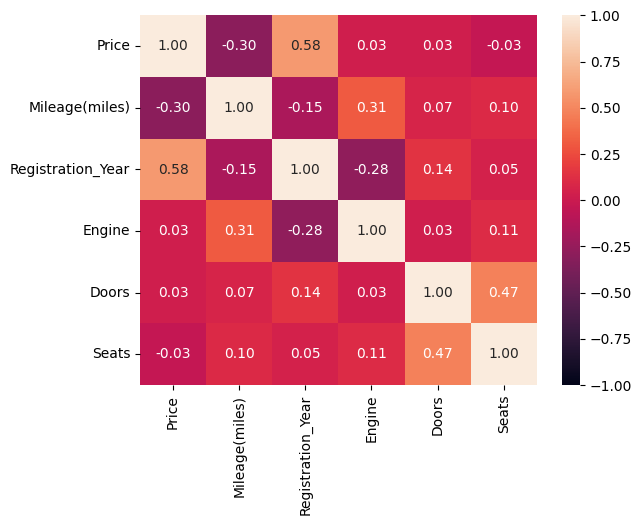

In [423]:
correlation = df_continuous.corr(method='pearson')
sns.heatmap(correlation, vmin=-1.0, vmax=1.0, annot=True, fmt=".2f")

'''
Price와 이동거리(마일) 사이에는 반비례 관계
Price와 등록일은 비례관계 즉, 등록일(혹은 연식?)이 늦어질수록 가격이 (시세가) 높아지는 것으로 분석됨.
'''

In [429]:
df_discrete.columns.drop(labels=['title'])

Index(['Fuel type', 'Body type', 'Gearbox', 'Emission Class'], dtype='object')

In [430]:
# 이산형 컬럼에서 Title을 제외하고 전부 원-핫 인코딩
df_one_hot = pd.get_dummies(df_discrete, columns=df_discrete.columns.drop(labels=['title']))
df_one_hot

,title,Fuel type_Diesel,Fuel type_Petrol,Fuel type_Petrol Hybrid,Body type_Combi Van,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,...,Body type_SUV,Body type_Saloon,Gearbox_Automatic,Gearbox_Manual,Emission Class_Euro 1,Emission Class_Euro 2,Emission Class_Euro 3,Emission Class_Euro 4,Emission Class_Euro 5,Emission Class_Euro 6
0,ABARTH 500,False,True,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
3,ALFA ROMEO 159,False,True,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
4,ALFA ROMEO 159,True,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
5,ALFA ROMEO 159,True,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,True,False,False
6,ALFA ROMEO BRERA,True,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,VOLVO V70,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
3683,VOLVO V70,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
3684,VOLVO V70,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
3685,VOLVO XC90,True,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,True,False,False


In [435]:
df_discrete_merged_with_price = df_one_hot.merge(right=df[['title', 'Price']], on='title')
df_discrete_merged_with_price

,title,Fuel type_Diesel,Fuel type_Petrol,Fuel type_Petrol Hybrid,Body type_Combi Van,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,...,Body type_Saloon,Gearbox_Automatic,Gearbox_Manual,Emission Class_Euro 1,Emission Class_Euro 2,Emission Class_Euro 3,Emission Class_Euro 4,Emission Class_Euro 5,Emission Class_Euro 6,Price
0,ABARTH 500,False,True,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,True,False,4950.0
1,ALFA ROMEO 159,False,True,False,False,False,False,False,False,False,...,True,False,True,False,False,False,True,False,False,2250.0
2,ALFA ROMEO 159,False,True,False,False,False,False,False,False,False,...,True,False,True,False,False,False,True,False,False,2420.0
3,ALFA ROMEO 159,False,True,False,False,False,False,False,False,False,...,True,False,True,False,False,False,True,False,False,2489.0
4,ALFA ROMEO 159,True,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,True,False,False,2250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133628,VOLVO V70,False,True,False,False,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,2195.0
133629,VOLVO XC90,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,2995.0
133630,VOLVO XC90,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,1994.0
133631,VOLVO XC90,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,2995.0


In [448]:
# 독립 변수와 종속 변수 정의
df_continuous_dropna = df_continuous.dropna(axis=0)
X = df_continuous_dropna[df_continuous_dropna.columns.drop(labels=['Price'])].values
y = df_continuous_dropna['Price'].values

display(X, y)

X_df = pd.DataFrame(X, columns=df_continuous_dropna.columns.drop(labels=['Price']))
X_df

array([[8.80000e+04, 2.00900e+03, 1.40000e+00, 3.00000e+00, 4.00000e+00],
       [1.32000e+05, 2.00800e+03, 1.80000e+00, 4.00000e+00, 5.00000e+00],
       [8.64000e+04, 2.00900e+03, 1.90000e+00, 4.00000e+00, 5.00000e+00],
       ...,
       [1.44726e+05, 2.00600e+03, 2.40000e+00, 5.00000e+00, 5.00000e+00],
       [1.74500e+05, 2.00600e+03, 2.40000e+00, 5.00000e+00, 7.00000e+00],
       [1.61000e+05, 2.01000e+03, 2.40000e+00, 5.00000e+00, 5.00000e+00]],
      shape=(2681, 5))

array([4950., 2250., 2420., ..., 2195., 2995., 1994.], shape=(2681,))

,Mileage(miles),Registration_Year,Engine,Doors,Seats
0,88000.0,2009.0,1.4,3.0,4.0
1,132000.0,2008.0,1.8,4.0,5.0
2,86400.0,2009.0,1.9,4.0,5.0
3,68000.0,2008.0,2.4,4.0,5.0
4,109000.0,2007.0,2.4,3.0,4.0
...,...,...,...,...,...
2676,274100.0,2004.0,2.4,5.0,5.0
2677,274100.0,2004.0,2.4,5.0,5.0
2678,144726.0,2006.0,2.4,5.0,5.0
2679,174500.0,2006.0,2.4,5.0,7.0


In [442]:
# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# 다중선형 회귀 모델 객체 생성
reg = linear_model.LinearRegression()

# 다중선형 회귀 모델 학습
reg.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수 계산
# 결정계수가 1에 가까울수록 모델 예특 정확도가 높다고 판단, 0에 가까우면 예측 정확도가 낮은걸로 판단
r_squre = reg.score(X_test, y_test)
print('R-squre: ', r_squre)
print('\n')

# 회귀식의 기울기
print('X 변수의 기울기: ', reg.coef_)
print('\n')

# 회귀식의 y절편
print('절편: ', reg.intercept_)
print('\n')

R-squre:  0.5498667533249724


X 변수의 기울기:  [-1.18409336e-02  3.39389731e+02  1.20353755e+03 -3.77604917e+01
 -1.95844397e+02]


절편:  -678370.4991812595


